In [ ]:
%matplotlib inline

In [ ]:
pip install Cython

In [ ]:
!pip install fastai -q --upgrade

     |████████████████████████████████| 189 kB 5.4 MB/s 
     |████████████████████████████████| 56 kB 3.8 MB/s 


In [ ]:
from fastai import *
from fastai.vision import *
from fastai.vision.gan import *

import os
from os import listdir


In [ ]:
import fastai
print(fastai.__version__)
from fastai.vision.all import *
from pathlib import Path

2.5.3


In [ ]:
from fastai.vision.all import *


set_seed(42) 

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download moltean/fruits

 99% 1.27G/1.28G [00:12<00:00, 188MB/s]
100% 1.28G/1.28G [00:12<00:00, 109MB/s]


In [ ]:
!unzip fruits

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/124_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Traini

In [ ]:


path = Path('/content/fruits-360_dataset/fruits-360/Training')

In [ ]:
os.listdir(path)

['Chestnut',
 'Pepper Orange',
 'Eggplant',
 'Pear Stone',
 'Limes',
 'Avocado ripe',
 'Cherry 2',
 'Apple Golden 3',
 'Tomato 4',
 'Kohlrabi',
 'Mangostan',
 'Nectarine Flat',
 'Pear Williams',
 'Tomato 1',
 'Physalis',
 'Pear Monster',
 'Plum 3',
 'Tomato 3',
 'Cauliflower',
 'Beetroot',
 'Mulberry',
 'Banana Red',
 'Nut Pecan',
 'Apple Red Yellow 1',
 'Watermelon',
 'Redcurrant',
 'Pear Red',
 'Tamarillo',
 'Apple Red 1',
 'Kumquats',
 'Potato Sweet',
 'Kaki',
 'Tomato Yellow',
 'Apple Red Yellow 2',
 'Potato White',
 'Raspberry',
 'Pepper Yellow',
 'Grape White 4',
 'Peach 2',
 'Hazelnut',
 'Grape Pink',
 'Potato Red Washed',
 'Grape White 2',
 'Papaya',
 'Banana Lady Finger',
 'Cucumber Ripe',
 'Pear Abate',
 'Pomegranate',
 'Guava',
 'Grapefruit White',
 'Peach Flat',
 'Grape White',
 'Peach',
 'Kiwi',
 'Pepino',
 'Banana',
 'Tomato Heart',
 'Nectarine',
 'Grapefruit Pink',
 'Potato Red',
 'Pitahaya Red',
 'Walnut',
 'Passion Fruit',
 'Apple Braeburn',
 'Pear Forelle',
 'Plum',
 

In [ ]:
def get_dls(bs, size):
    dblock = DataBlock(blocks = (ImageBlock, CategoryBlock),
                       get_items = get_image_files,
                       get_y = parent_label,
                       splitter = RandomSplitter(),
                       item_tfms = Resize(size)
                      )
    return dblock.dataloaders(path, bs = bs)

In [ ]:
dls = get_dls(16, 32)

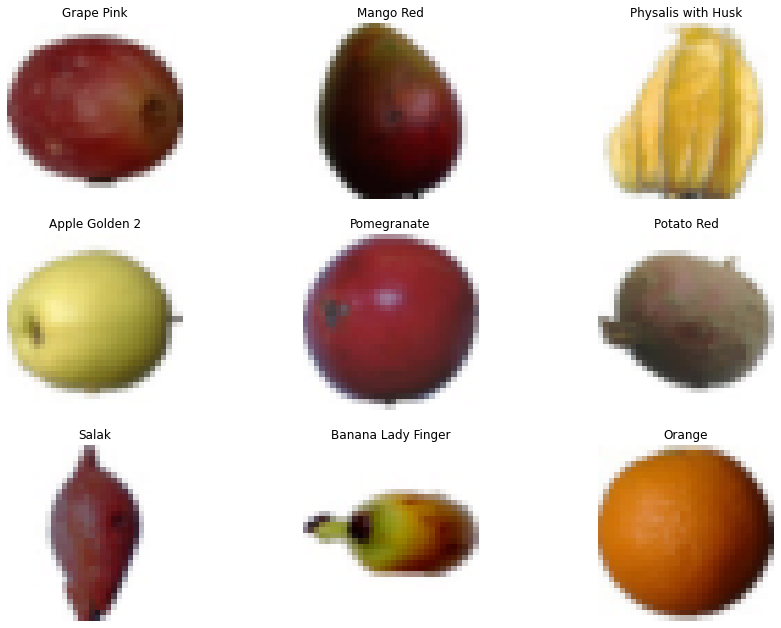

In [ ]:
dls.show_batch(figsize=(15,11))

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=[accuracy, error_rate])

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0020892962347716093)

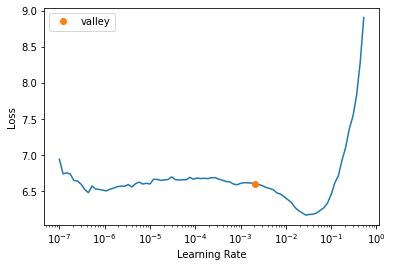

In [ ]:
learn.lr_find()

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=[accuracy, error_rate])
learn.fit_one_cycle(10,1e-3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.139247,0.275914,0.934407,0.065593,18:08
1,0.397935,0.030101,0.991579,0.008421,18:24
2,0.199589,0.019373,0.995937,0.004063,18:36
3,0.126224,0.005251,0.998523,0.001477,18:27
4,0.074474,0.000822,0.999926,0.000074,18:44
5,0.056733,0.000667,0.999926,0.000074,18:52
6,0.034528,0.000228,1.000000,0.000000,18:31
7,0.014083,0.000033,1.000000,0.000000,18:29


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.139247,0.275914,0.934407,0.065593,18:08
1,0.397935,0.030101,0.991579,0.008421,18:24
2,0.199589,0.019373,0.995937,0.004063,18:36
3,0.126224,0.005251,0.998523,0.001477,18:27
4,0.074474,0.000822,0.999926,0.000074,18:44
5,0.056733,0.000667,0.999926,0.000074,18:52
6,0.034528,0.000228,1.000000,0.000000,18:31
7,0.014083,0.000033,1.000000,0.000000,18:29
8,0.020092,0.000035,1.000000,0.000000,18:23
9,0.028409,0.000052,1.000000,0.000000,18:26


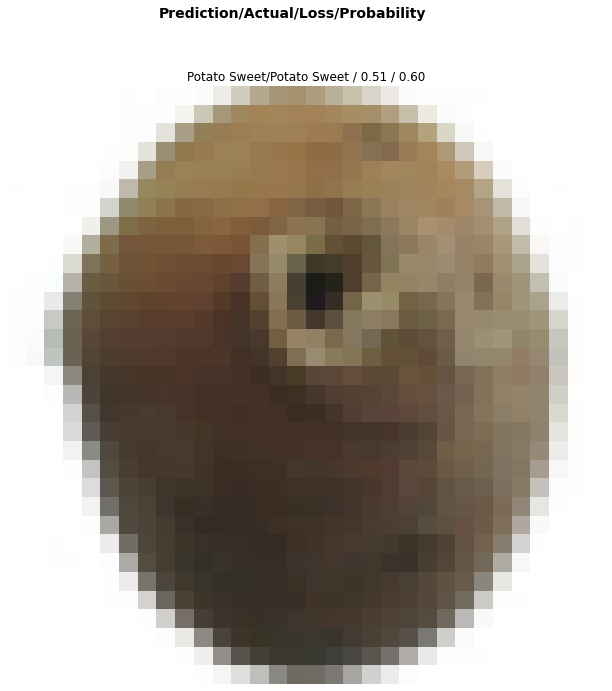

In [ ]:
interpretation = ClassificationInterpretation.from_learner(learn)
losses, indices = interpretation.top_losses()
interpretation.plot_top_losses(1, figsize=(15,11))

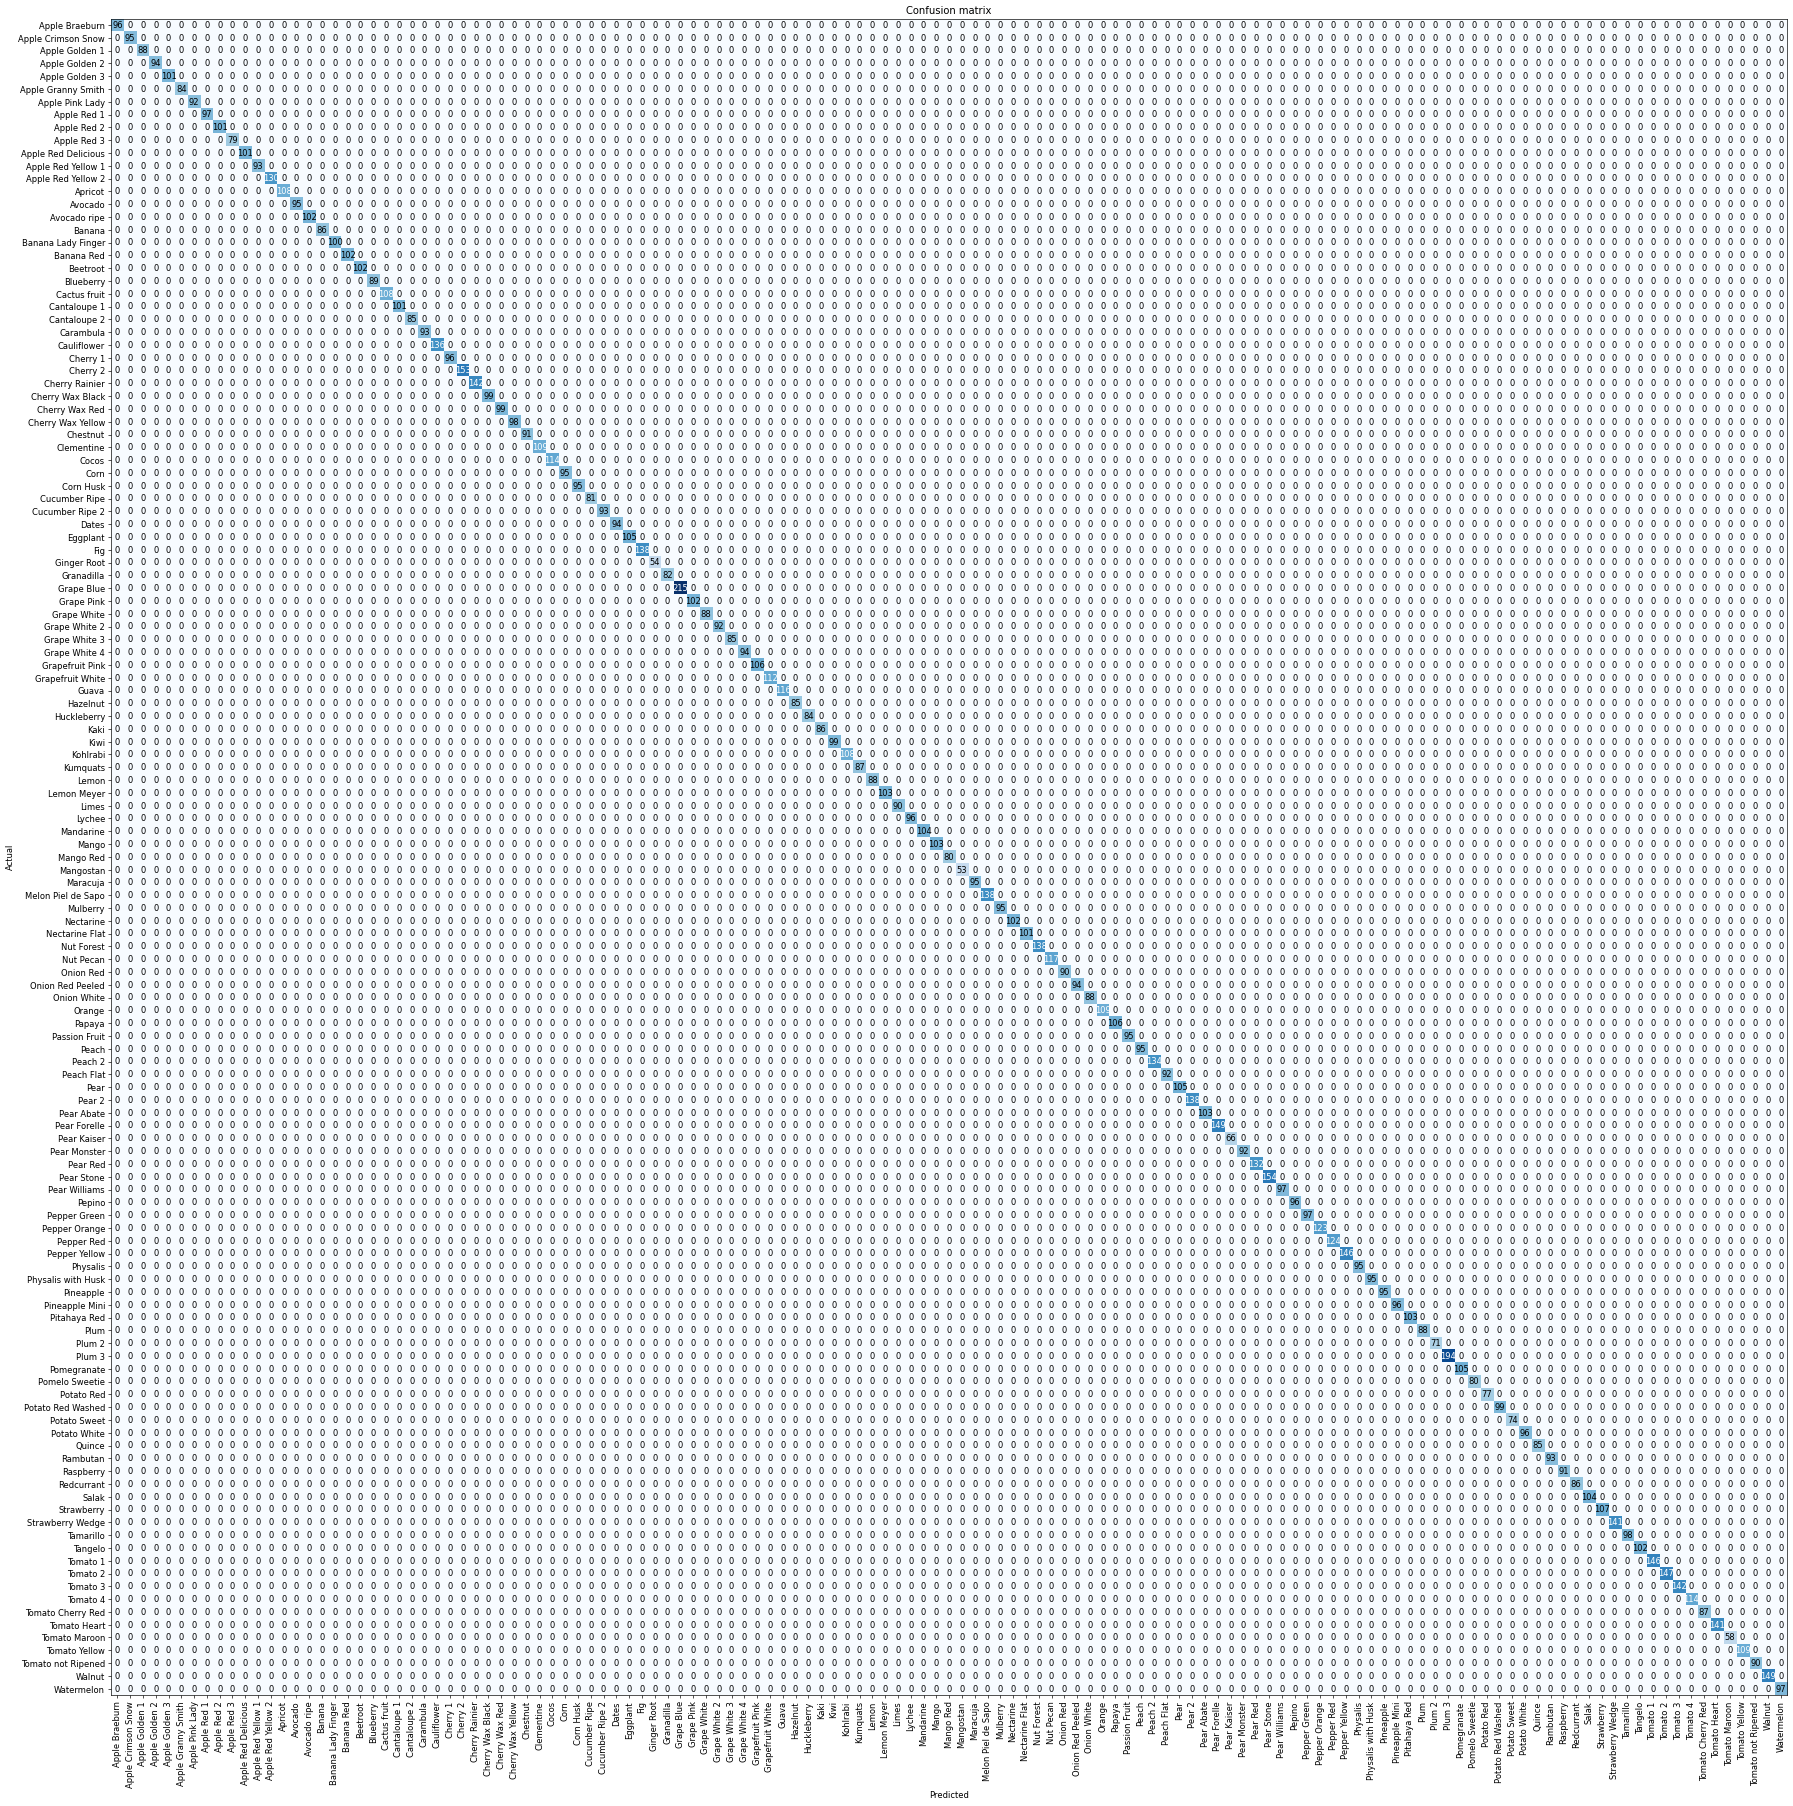

In [ ]:
interpretation.plot_confusion_matrix(figsize=(30,30), dpi=60)

In [ ]:
interpretation.most_confused(min_val=2)

[]

In [ ]:
learn.save('classification-1')